In [15]:
import pandas as pd
import codecs
import os
from pathlib import Path
from pandas.core.frame import DataFrame

## importer les présenataion des événements en 2012-2020 en dataframe depuis les fichiers .txt

In [16]:
path = "corpora/presentations_events_pdt/by_years/"
dirs = os.listdir(path)
dirs

['2013',
 '2014',
 '2015',
 '2012',
 '.DS_Store',
 '2017',
 '2019',
 '2020',
 '2018',
 '2016']

In [17]:
del dirs[4]
dirs

['2013', '2014', '2015', '2012', '2017', '2019', '2020', '2018', '2016']

In [18]:
allLines = []
Titles = []
Years = []
for d in dirs:
    files = os.listdir(path+d+'/')
    
    for i in files:
        file = open(os.path.join(path+d+'/'+i),'r',
                    encoding="utf8", errors='ignore')
        allLines.append(file.read().replace('\s','').
                    replace('\n',' ').replace('\x00',''))
        title = i.replace(".txt","").replace("+_UTF8","")
        Titles.append(title)
        Years.append(d)
        descri ={"Year": Years, "Title" : Titles ,"Presentations" : allLines }
        data_description = DataFrame(descri)
data_description

Year                                              Title  \
0    2013                                          Myriorama   
1    2013  Conversations_sur_tout_ce_qui_tombe_-_3ème_re...   
2    2013  Hell_as_Pavilion_-_The_Callas_and_the_Callasettes   
3    2013                                         Gudrun_Gut   
4    2013              Présentation_de_la_revue_Locus_Solus   
..    ...                                                ...   
594  2016                                    Conversation_#3   
595  2016  Yi_King_Operators,_Nicolas_Montgermont,_Jean-F...   
596  2016               Daphné_Hérétakis_[Split_:_Screen]   
597  2016            Cheesy_Display_[Les_Lundis_du_Pavillon]   
598  2016  The_sentimental_mood_of_the_big_data_[Les_Lund...   

                                         Presentations  
0    Myriorama Ceel Mogami de Haas et Vianney Fivel...  
1    Conversations sur tout ce qui tombe - 3ème ren...  
2    Hell as Pavilion - The Callas and the Callaset...  
3    Gudrun Gut Après une enfance dans la Lande de ...  
4    Présentation de la revue Locus Solus Dans le c...  
..                                                 ...  
594  Conversation #3 Dans le cadre de la carte blan...  
595  Yi King Operators, Nicolas Montgermont, Jean-F...  
596  Daphné Hérétakis [Split / Screen] Rencontre SP...  
597  Cheesy Display [Les Lundis du Pavillon] Lundi ...  
598  The sentimental mood of the big data [Les Lund...  

[599 rows x 3 columns]

In [19]:
#data_description.sort_values("Title",inplace=True)
data_description = data_description[~(data_description['Title'] == '.DS_Store')]
data_description.drop_duplicates(subset=None, keep='first', inplace=False)
data_description.sort_values("Year",inplace=True)
data_description = data_description.reset_index(drop=True)
data_description.index = data_description.index + 1
data_description['LenPresentation'] = data_description['Presentations'].str.len()
data_description

/Users/huxinmin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Year                                         Title  \
1    2012                                BENJAMIN_SEROR   
2    2012                                 ALAIN_KREMSKI   
3    2012                                   OLIVER_BEER   
4    2012                                Oriol_Vilanova   
5    2012                              GLORIA_FRIEDMANN   
..    ...                                           ...   
587  2020  Lancement_du_deuxième_numéro_de Speciwomen   
588  2020                        Jusqu'ici_tout_va_bien   
589  2020                Notre_monde_brûle_Projections   
590  2020  Le_«_Parti_de_la_Multiplicité_»_Table-ronde   
591  2020            Bolatito_Aderemi_Ibitola_[ANNULÉ]   

                                         Presentations  LenPresentation  
1    BENJAMIN SEROR George (version 6) Benjamin Ser...              339  
2    ALAIN KREMSKI Œuvres de Gurdjieff - De Hartman...              479  
3    OLIVER BEER The Resonance Project Le Palais de...             1337  
4    Oriol Vilanova EX AEQUO De sa collection de ca...              875  
5    GLORIA FRIEDMANN Dolce Vita Entre peinture, th...              776  
..                                                 ...              ...  
587  Lancement du deuxième numéro de Speciwomen En ...             1095  
588  Jusqu'ici tout va bien Workshop de l'école Kou...             4380  
589  Notre monde brûle - Projections Des mineurs du...             5619  
590  Le « Parti de la Multiplicité » - Table-ronde ...             1195  
591  Bolatito Aderemi-Ibitola - [ANNULÉ] Dans le ca...             2640  

[591 rows x 4 columns]

<AxesSubplot:xlabel='Year'>

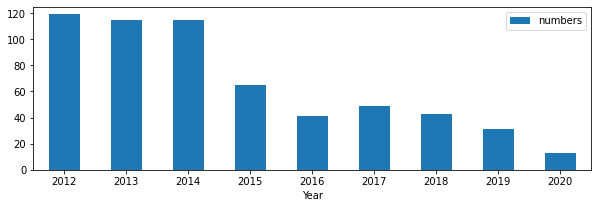

In [20]:
num_year = data_description.groupby('Year').size().to_frame()
num_year.columns = ['numbers']
num_year.plot.bar(rot=0,figsize=(10,3))

In [21]:
num_year.T

Year     2012  2013  2014  2015  2016  2017  2018  2019  2020
numbers   119   115   115    65    41    49    43    31    13

In [22]:
data_description.to_csv('corpus_events.csv', index=1, header=True)
dfdes = DataFrame(data_description['LenPresentation'].describe()).T
dfdes.to_csv('dfdes_event.csv')

<AxesSubplot:xlabel='Year', ylabel='LenPresentation'>

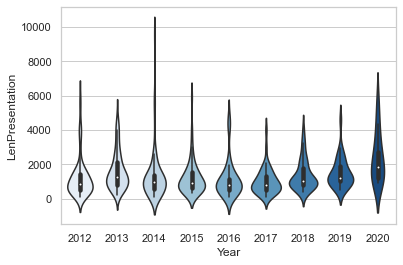

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(x='Year',y='LenPresentation', alpha=0.2, palette='Blues', data=data_description)

<AxesSubplot:ylabel='LenPresentation'>

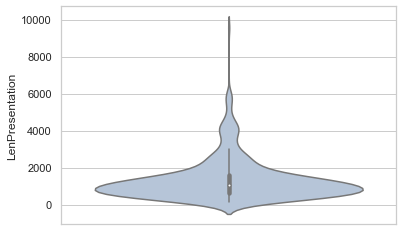

In [24]:
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.violinplot(y='LenPresentation', data=data_description, alpha=0.2, color='lightsteelblue')

In [37]:
dfdes

count        mean          std    min    25%     50%     75%  \
LenPresentation  591.0  1344.35533  1112.474005  115.0  637.5  1055.0  1587.0   

                    max  
LenPresentation  9561.0

## modélisationn de sujet

In [25]:
docs = data_description['Presentations'].str.lower()
docs = docs.str.replace('\'', '’')
docs = docs.str.replace("l’", "")
docs = docs.str.replace('avenue de new-york', 'avenue_de_New_york')
docs = docs.str.replace('avenue du président-wilson', 'avenue_du_Président_Wilson')
docs = docs.str.replace('palais de tokyo', 'Palais_De_Tokyo')
docs = docs.str.replace('tokyo art club', 'tokyo_art_club')
docs = docs.str.replace('new york', 'new_york')
docs = docs.str.replace('hong kong', 'hong_kong')
docs = docs.str.replace('hip-hop', 'Hip_Hop')
docs = docs.str.replace('hip hop', 'Hip_Hop')
docs = docs.str.replace('table-ronde', 'table_ronde')
docs = docs.str.replace('table ronde', 'table_ronde')
docs = docs.str.replace('tables rondes', 'table_ronde')
docs = docs.str.replace('l’art contemporain', 'art_Contemporain')
docs = docs.str.replace('l’art moderne', 'art_Moderne')
docs = docs.str.replace('l’histoire de l’art', 'histoire_de_l’art')
docs = docs.str.replace('œuvres d’art', 'œuvres_d’art')
docs = docs.str.replace('œuvre d’art', 'œuvre_d’art')
docs = docs.str.replace('objet d’art', 'objet_d’art')
docs = docs.str.replace('Musée d’art', 'Musée_d’art')
docs = docs.str.replace('historiens d’art', 'historiens_d’art')
docs = docs.str.replace('l’historien d’art', 'historien_d’art')
docs = docs.str.replace('d’art urbain', 'art_urbain')
docs = docs.str.replace('musée d’art contemporain', 'musée_d’art_contemporain ')
docs = docs.str.replace('critique d’art', 'critique_d’art')
docs = docs.str.replace('critiques d’art', 'critiques_d’art')
docs = docs.str.replace('écoles d’art', 'écoles_d’art')
docs = docs.str.replace('école d’art', 'école_d’art') 
docs = docs.str.replace('amateurs d’art', 'amateurs_d’art') 
docs = docs.str.replace('amateur d’art', 'amateurs_d’art') 
docs = docs.str.replace('collection d’art', 'collection_d’art') 
docs = docs.str.replace('centre d’art', 'centre_d’art')
docs = docs.str.replace('centres d’art', 'centres_d’art')
docs = docs.str.replace('paris ass book fair', 'Paris_Ass_Book_Fair')
docs = docs.str.replace('d’artiste', 'artiste')
docs = docs.str.replace('d’artistes', 'artiste')
docs = docs.str.replace('artistes', 'artiste')

docs = docs.str.replace('john giorno', 'John_Giorno')
docs = docs.str.replace('marcela iacub ', 'Marcela_Iacub')
docs = docs.str.replace('johanne bouvier', 'Johanne_Bouvier')
docs = docs.str.replace('jeremy rifkin', 'Jeremy_Rifkin')
docs = docs.str.replace('keiichiro shibuya', 'Keiichiro_Shibuya')
docs = docs.str.replace('lucio fontana', 'Lucio_Fontana')
docs = docs.str.replace('vittoria matarrese', 'Vittoria_Matarrese')
docs = docs.str.replace('jean michel frodon', 'Jean_Michel_Frodon')
docs = docs.str.replace('marcel duchamp', 'Marcel_Duchamp')
docs = docs.str.replace('andy warhol', 'Andy_Warhol')


docs = docs.str.replace('yves saint laurent', 'Yves_Saint_Laurent')
docs = docs.str.replace('pavillon neuflize obc', 'Pavillon_Neufliz_Obc')
docs = docs.str.replace('jean pierre ceton', 'Jean_Pierre_Ceton')
docs = docs.str.replace('john cage', 'John_Cage')
docs = docs.str.replace('juan pérez agirregoikoa', 'Juan_Pérez_Agirregoikoa')
docs = docs.str.replace('Centre Georges Pompidou', 'Centre_Georges_Pompidou')




docs = list(docs)
docs

['benjamin seror george (version 6) benjamin seror présente un opéra autobiographique improvisé. artiste enrichit en effet sa pièce d’une nouvelle séquence à chaque représentation, écrivant son récit au fur et à mesure de la performance en interaction avec le public, avec comme seuls éléments scéniques un piano à queue et une maquette...',
 'alain kremski œuvres de gurdjieff - de hartmann ayant choisi de délaisser les chemins d’une carrière institutionnelle toute tracée, alain kremski explore univers mystique des sons de cloches de temples, gongs, bols bouddhiques, bols chantants tibétains, etc. au Palais_De_Tokyo, il interprète un programme autour de  georges gurdjieff et thomas de hartmann, pour deux sessions intemporelles de trois heures profondément apaisantes.  jeudi de 18h à 21h et vendredi de 19h et 22h',
 'oliver beer the resonance project le Palais_De_Tokyo se transforme en un gigantesque instrument de musique : grâce à un enregistrement réalisé en direct, les voix d’un chœur 

In [26]:
print(docs, file=open("output.txt", "a"))

In [27]:
import re
import string
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from nltk.stem import WordNetLemmatizer

In [28]:
stopWords_more = ['«','»',"h","er","e","cest","nont","en","dun","dune","€","dart","c'est","y","euro","quil","très","m","q","atil","sil",
                 "estil","jusqu’à","sest","s’est","n’est", "c’est", "d’un","d’une","l’un","d’autres","d’euros","celleci","m°","l’on","an",
                  "ème","kg","tél","sest","jusqu’au", "faire", "qu’on", "l’a", "qu’il", "n’y", "n’a", "s’il", "plupart", "autour", "qu’à",
                 "n’en", "qu’un", "–", "ici", "min", "p", "s", "s’en", "pas", "mot", "x", "mix", "an", "quon", "art", "l’art", "d’art",
                 "choses","d","mot","fois","—","•","b","mois","’","ère","liés","qu’elle","mot","grâce","→","‚ä≤","‚ä¢","d’en","non","l",
                 "venez","hh","ans","éd","ensemble","qu'il", "jusqu’ici","années","van","joep","wim","d’entrée","aka","twittershare",
                  "mailshare","facecbookshare","d’être","artiste","j’ai"]
names = ["PalaisDeTokyo","facebook","david","tom","anne","vincent","von","michel","charle","nicolas","twitter","jean", "alain","camille",
         "mars","alix","yves","alice","laure","ben","sara","sarah","julie","paul","laurant","emile","adrien","denis","alexis","cécile",
         "robert","jeudi","lundi","samedi","mardi","delphine","gilles","julius","christophe","jeanchristophe","adélaïde","veilhan",
         "malkin","duchat","marcel","alexandra","xavier","jérôme","klein","viennent","roger","fedrico","sam","lucas","gerald","stéphane",
         "fabien","abdellah","VittoriaMatarrese","emmanuelle","karroum","hélène","josèfa","ntjam","di","moulton","raphaël","bruguera",
         "violaine","julien","lafon","bruguera","christian","rossi","lefebvre","noé","soulier","lewis","jonathan","chang","alexander",
         "JohnGiorno","justin","pauline","simon","tania","thomas","emanuele","patrick","louise","jeanmichel","john","gwenaël","léa","licia",
         "demuro","catherine","nemeth","caroline","laurent","charlie","claire","charlie","dominique","julia","jeremy","theaster","gates",
         "holmes","arthur","ladj","ly","george","callas","Rita","alan","pascal","olivier","lee","jr","jeanbaptiste","garcia","georges",
         "federico","guillaume"]
days = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
months = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]

stopWords = list(fr_stop) + list(en_stop) + stopWords_more + names + days + months
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    nonum_free = re.sub(r'\d+', '', doc)
    punc_free = "".join(p for p in nonum_free if p not in exclude)
    doublespace_free = re.sub('\s+', ' ', punc_free).strip()
    stop_free = " ".join([i for i in doublespace_free.split() if i not in stopWords])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())

    return stop_free

doc_clean = [clean(doc).split() for doc in docs]
doc_clean

[['benjamin',
  'seror',
  'version',
  'benjamin',
  'seror',
  'présente',
  'opéra',
  'autobiographique',
  'improvisé',
  'enrichit',
  'pièce',
  'nouvelle',
  'séquence',
  'représentation',
  'écrivant',
  'récit',
  'fur',
  'mesure',
  'performance',
  'interaction',
  'public',
  'seuls',
  'éléments',
  'scéniques',
  'piano',
  'queue',
  'maquette'],
 ['kremski',
  'œuvres',
  'gurdjieff',
  'hartmann',
  'choisi',
  'délaisser',
  'chemins',
  'carrière',
  'institutionnelle',
  'tracée',
  'kremski',
  'explore',
  'univers',
  'mystique',
  'sons',
  'cloches',
  'temples',
  'gongs',
  'bols',
  'bouddhiques',
  'bols',
  'chantants',
  'tibétains',
  'interprète',
  'programme',
  'gurdjieff',
  'hartmann',
  'sessions',
  'intemporelles',
  'heures',
  'profondément',
  'apaisantes'],
 ['oliver',
  'beer',
  'resonance',
  'project',
  'transforme',
  'gigantesque',
  'instrument',
  'musique',
  'enregistrement',
  'réalisé',
  'direct',
  'voix',
  'chœur',
  'déc

In [29]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import CoherenceModel, LdaModel
from gensim import models

In [30]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix_event = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
#Lda = gensim.models.ldamodel.LdaModel
ldamodel_event = gensim.models.LdaMulticore(doc_term_matrix_event, num_topics=8, id2word = dictionary, 
                                            passes=100, chunksize=10, alpha='symmetric',iterations=100,per_word_topics=True)

In [12]:
#ldamodel_event.print_topics(num_words=20)

In [31]:
num_topics = 8
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 40);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [36]:
event_topic = get_lda_topics(ldamodel_event, num_topics)
event_topic.index = event_topic.index + 1
event_topic

Topic # 01    Topic # 02    Topic # 03    Topic # 04      Topic # 05  \
1        signature    exposition        soirée         temps           album   
2        librairie   performance        invite         monde            mort   
3            école         cadre     programme         sound       dictateur   
4      inscription         paris    rendezvous         musée         musique   
5         festival         corps       musique          voir         concert   
6           invite       travail         libre        époque         guitare   
7               dj        public       atelier         house     monographie   
8            paris       travers      occasion          réel            zoom   
9           france  performances         point    parisienne             hop   
10         disturb         monde          club       francis           lindy   
11        éditions          arts      création      organisé          camion   
12        institut         danse         temps       univers           chant   
13            nova        partir       propose        esprit          chatte   
14      kourtrajmé        france  installation        poèmes            jazz   
15          billet     résidence       sonores     rencontre             pop   
16          family         œuvre        espace          beau            trio   
17        français     rencontre       soutien      invitent    électronique   
18    présentation        poésie          live        genres         cynthia   
19             bar      pratique    exposition        reçoit     performance   
20           livre        sonore        projet          rêve          arrive   
21           label      création         cours      histoire       pierpaolo   
22     proposition      occasion          lieu         chute        concerts   
23         ouvrage        espace   projections         japon         réunion   
24             set       musique         paris          yeux           pluie   
25      communauté      national         place           âme            zone   
26       relations         scène       dernier  contemporain          tandis   
27       lancement        formes          nuit         tombe           vidéo   
28          livres        centre    artistique          voit        emmanuel   
29           bande  présentation        partir      rapports        musicale   
30          limite      histoire         cadre        temple        créature   
31  problématiques         livre    projection          tête         bientôt   
32    alternatives       journée   disponibles        entier         rivages   
33          danesi         série       invités       malaise          groupe   
34           ronde        projet    expérience        double            luca   
35           petit         forme         scène        gérard          sombre   
36             djs     travaille      musicale       matière    métamorphose   
37          maison        images        propre  scientifique        morceaux   
38      collectifs      pavillon         corps   aujourd’hui        hongkong   
39           mindu      présente      workshop       montrer  JohanneBouvier   
40      tableronde     lancement     rencontre        vérité          taiwan   

      Topic # 06      Topic # 07        Topic # 08  
1           film          nigger           culture  
2          monde   mathématiques            studio  
3     collective          rituel              nuit  
4         saison             gay            france  
5          films         eastman            formes  
6        enfants        critères          histoire  
7           mode  existentielles             muoto  
8          durée            evil  ParisAssBookFair  
9     collection           crazy           blanche  
10        femmes        derobert              dada  
11        palais           marti           fresnoy  
12        cinéma             lié            vivier  
13       univers         concert      

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

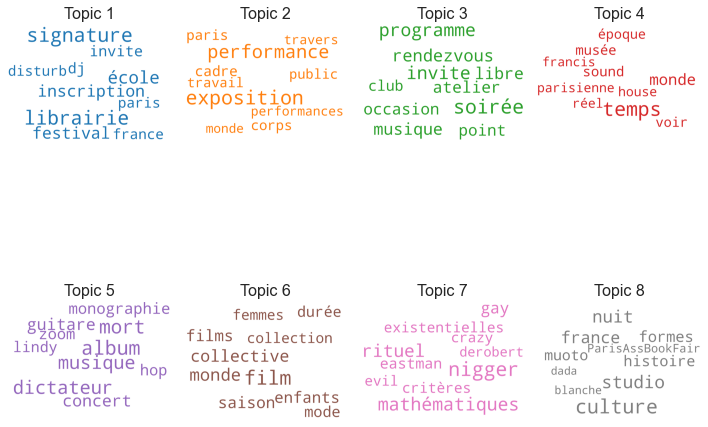

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopWords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel_event.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [259]:
import pyLDAvis
import warnings
try:
  import pyLDAvis.gensim
  CAN_VISUALIZE = True
  pyLDAvis.enable_notebook()
  from IPython.display import display
except ImportError:
    ValueError("SKIP: please install pyLDAvis")
    CAN_VISUALIZE = False
warnings.filterwarnings('ignore') 
%matplotlib inline

prepared = pyLDAvis.gensim.prepare(ldamodel_event, doc_term_matrix_event, dictionary)
pyLDAvis.display(prepared)

https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/ 

In [33]:
# Compute Coherence Score using c_v
coherence_model_lda_event = CoherenceModel(model=ldamodel_event, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda_event = coherence_model_lda_event.get_coherence()
print('\nCoherence Score: ', coherence_lda_event)


Coherence Score:  0.3926617267155861


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(doc_term_matrix_event, num_topics=num_topics, id2word = dictionary, 
                                            passes=100, chunksize=10, alpha='symmetric',iterations=100,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

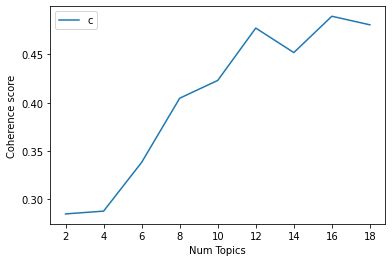

In [176]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=doc_term_matrix_event, texts=doc_clean, 
                                                        start=2, limit=20, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=doc_term_matrix_event, texts=doc_clean, 
                                                        start=2, limit=20, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix_event, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel_event, corpus=doc_term_matrix_event, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.reset_index(drop=True)
df_dominant_topic.index = df_dominant_topic.index + 1
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
1              0             5.0              0.9687   
2              1             5.0              0.9734   
3              2             2.0              0.9911   
4              3             1.0              0.9873   
5              4             4.0              0.7454   
..           ...             ...                 ...   
587          586             5.0              0.6238   
588          587             0.0              0.4927   
589          588             5.0              0.6799   
590          589             0.0              0.4892   
591          590             1.0              0.8777   

                                              Keywords  \
1    film, monde, collective, saison, films, enfant...   
2    film, monde, collective, saison, films, enfant...   
3    soirée, invite, programme, rendezvous, musique...   
4    exposition, performance, cadre, paris, corps, ...   
5    album, mort, dictateur, musique, concert, guit...   
..                                                 ...   
587  film, monde, collective, saison, films, enfant...   
588  signature, librairie, école, inscription, fest...   
589  film, monde, collective, saison, films, enfant...   
590  signature, librairie, école, inscription, fest...   
591  exposition, performance, cadre, paris, corps, ...   

                                                  Text  
1    [benjamin, seror, version, benjamin, seror, pr...  
2    [kremski, œuvres, gurdjieff, hartmann, choisi,...  
3    [oliver, beer, resonance, project, transforme,...  
4    [oriol, vilanova, ex, aequo, collection, carte...  
5    [gloria, friedmann, dolce, vita, peinture, thé...  
..                                                 ...  
587  [lancement, numéro, speciwomen, présence, phil...  
588  [bien, workshop, école, kourtrajmé, accueille,...  
589  [monde, brûle, projections, mineurs, suriname,...  
590  [parti, multiplicité, tableronde, bady, dallou...  
591  [bolatito, aderemiibitola, annulé, cadre, manu...  

[591 rows x 5 columns]

In [33]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].replace({
                                            0.0:'Topic1 : rencontres et signatures', 
                                             1.0:'Topic2 : performances d\'expositions', 
                                             2.0:'Topic3 : soirées et fêtes', 
                                             3.0:'Topic4 : explorations sonore et expérimentaux', 
                                             4.0:'Topic5 : performance musicale et sonore', 
                                             5.0:'Topic6 : films et la mode', 
                                             6.0:'Topic7 : sujets particuliers', 
                                             7.0:'Topic8 : événements co-organisés'})

In [34]:
df_dominant_topic['Dominant_Topic']

1                    Topic6 : films et la mode
2                    Topic6 : films et la mode
3                    Topic3 : soirées et fêtes
4          Topic2 : performances d'expositions
5      Topic5 : performance musicale et sonore
                        ...                   
587                  Topic6 : films et la mode
588          Topic1 : rencontres et signatures
589                  Topic6 : films et la mode
590          Topic1 : rencontres et signatures
591        Topic2 : performances d'expositions
Name: Dominant_Topic, Length: 591, dtype: object

In [35]:
from natsort import natsorted
tp_count = df_dominant_topic["Dominant_Topic"].value_counts().to_frame()
tp_count = tp_count.reindex(natsorted(tp_count.index))
tp_count

Dominant_Topic
Topic1 : rencontres et signatures                          77
Topic2 : performances d'expositions                       206
Topic3 : soirées et fêtes                                 114
Topic4 : explorations sonore et expérimentaux              32
Topic5 : performance musicale et sonore                    30
Topic6 : films et la mode                                  83
Topic7 : sujets particuliers                               13
Topic8 : événements co-organisés                           36

<AxesSubplot:>

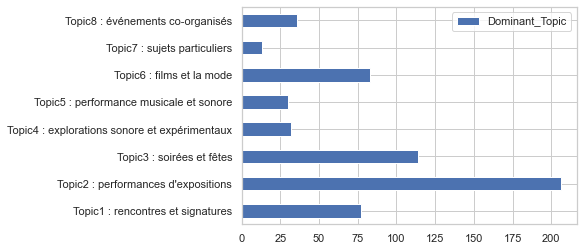

In [36]:
tp_count.plot.barh()

In [265]:
ldamodel_event.save('lda_event.model')

In [8]:
ldamodel_event = LdaModel.load('lda_event.model')

In [277]:
data_description

Year                                         Title  \
1    2012                                BENJAMIN_SEROR   
2    2012                                 ALAIN_KREMSKI   
3    2012                                   OLIVER_BEER   
4    2012                                Oriol_Vilanova   
5    2012                              GLORIA_FRIEDMANN   
..    ...                                           ...   
587  2020  Lancement_du_deuxième_numéro_de Speciwomen   
588  2020                        Jusqu'ici_tout_va_bien   
589  2020                Notre_monde_brûle_Projections   
590  2020  Le_«_Parti_de_la_Multiplicité_»_Table-ronde   
591  2020            Bolatito_Aderemi_Ibitola_[ANNULÉ]   

                                         Presentations  LenPresentation  
1    BENJAMIN SEROR George (version 6) Benjamin Ser...              339  
2    ALAIN KREMSKI Œuvres de Gurdjieff - De Hartman...              479  
3    OLIVER BEER The Resonance Project Le Palais de...             1337  
4    Oriol Vilanova EX AEQUO De sa collection de ca...              875  
5    GLORIA FRIEDMANN Dolce Vita Entre peinture, th...              776  
..                                                 ...              ...  
587  Lancement du deuxième numéro de Speciwomen En ...             1095  
588  Jusqu'ici tout va bien Workshop de l'école Kou...             4380  
589  Notre monde brûle - Projections Des mineurs du...             5619  
590  Le « Parti de la Multiplicité » - Table-ronde ...             1195  
591  Bolatito Aderemi-Ibitola - [ANNULÉ] Dans le ca...             2640  

[591 rows x 4 columns]

In [37]:
df_topic_descrip = pd.concat([data_description, df_dominant_topic], axis=1)
df_topic_descrip

Year                                         Title  \
1    2012                                BENJAMIN_SEROR   
2    2012                                 ALAIN_KREMSKI   
3    2012                                   OLIVER_BEER   
4    2012                                Oriol_Vilanova   
5    2012                              GLORIA_FRIEDMANN   
..    ...                                           ...   
587  2020  Lancement_du_deuxième_numéro_de Speciwomen   
588  2020                        Jusqu'ici_tout_va_bien   
589  2020                Notre_monde_brûle_Projections   
590  2020  Le_«_Parti_de_la_Multiplicité_»_Table-ronde   
591  2020            Bolatito_Aderemi_Ibitola_[ANNULÉ]   

                                         Presentations  LenPresentation  \
1    BENJAMIN SEROR George (version 6) Benjamin Ser...              339   
2    ALAIN KREMSKI Œuvres de Gurdjieff - De Hartman...              479   
3    OLIVER BEER The Resonance Project Le Palais de...             1337   
4    Oriol Vilanova EX AEQUO De sa collection de ca...              875   
5    GLORIA FRIEDMANN Dolce Vita Entre peinture, th...              776   
..                                                 ...              ...   
587  Lancement du deuxième numéro de Speciwomen En ...             1095   
588  Jusqu'ici tout va bien Workshop de l'école Kou...             4380   
589  Notre monde brûle - Projections Des mineurs du...             5619   
590  Le « Parti de la Multiplicité » - Table-ronde ...             1195   
591  Bolatito Aderemi-Ibitola - [ANNULÉ] Dans le ca...             2640   

     Document_No                           Dominant_Topic  Topic_Perc_Contrib  \
1              0                Topic6 : films et la mode              0.9687   
2              1                Topic6 : films et la mode              0.9734   
3              2                Topic3 : soirées et fêtes              0.9911   
4              3      Topic2 : performances d'expositions              0.9873   
5              4  Topic5 : performance musicale et sonore              0.7454   
..           ...                                      ...                 ...   
587          586                Topic6 : films et la mode              0.6238   
588          587        Topic1 : rencontres et signatures              0.4927   
589          588                Topic6 : films et la mode              0.6799   
590          589        Topic1 : rencontres et signatures              0.4892   
591          590      Topic2 : performances d'expositions              0.8777   

                                              Keywords  \
1    film, monde, collective, saison, films, enfant...   
2    film, monde, collective, saison, films, enfant...   
3    soirée, invite, programme, rendezvous, musique...   
4    exposition, performance, cadre, paris, corps, ...   
5    album, mort, dictateur, musique, concert, guit...   
..                                                 ...   
587  film, monde, collective, saison, films, enfant...   
588  signature, librairie, école, inscription, fest...   
589  film, monde, collective, saison, films, enfant...   
590  signature, librairie, école, inscription, fest...   
591  exposition, performance, cadre, paris, corps, ...   

                                                  Text  
1    [benjamin, seror, version, benjamin, seror, pr...  
2    [kremski, œuvres, gurdjieff, hartmann, choisi,...  
3    [oliver, beer, resonance, project, transforme,...  
4    [oriol, vilanova, ex, aequo, collection, carte...  
5    [gloria, friedmann, dolce, vita, peinture, thé...  
..                                                 ...  
587  [lancement, numéro, speciwomen, présence, phil...  
588  [bien, workshop, école, kourtrajmé, accueille,...  
589  [monde, brûle, projections, mineurs, suriname,...  
590  [parti, multiplicité, tableronde, bady, dallou...  
591  [bolatito, aderemiibitola, annulé, cadre, manu...  

[591 rows x 9 columns]

<AxesSubplot:xlabel='Year'>

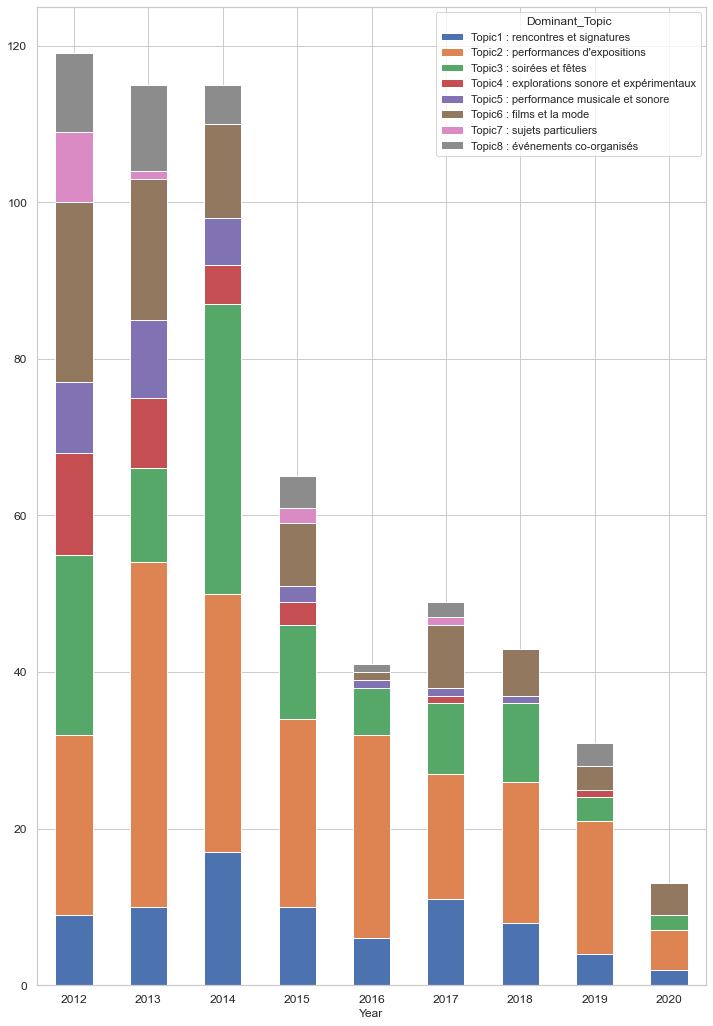

In [38]:
year_topic = df_topic_descrip[['Year', 'Dominant_Topic']]
(year_topic.groupby(['Year', 'Dominant_Topic']).size().unstack('Dominant_Topic')
 .plot.bar(stacked=True, figsize=(12,18), fontsize=12, rot=0))


<AxesSubplot:ylabel='Dominant_Topic'>

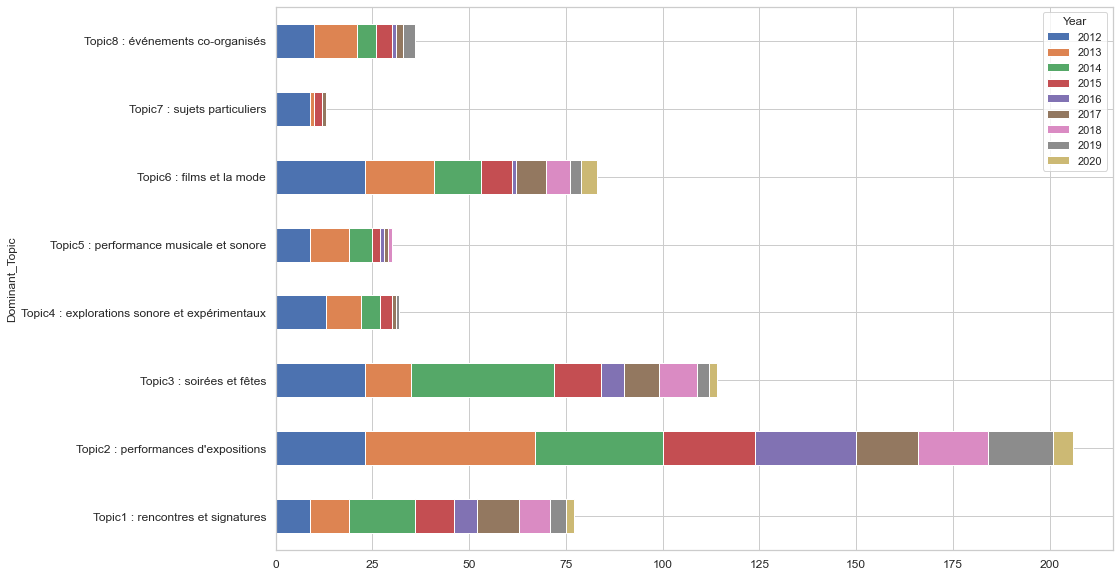

In [39]:
(year_topic.groupby(['Year', 'Dominant_Topic']).size().unstack('Year')
 .plot.barh(stacked=True, figsize=(15,10), fontsize=12, rot=0))

In [65]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel_event[doc_term_matrix_event]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 8
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 585 samples in 0.004s...
[t-SNE] Computed neighbors for 585 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 585 / 585
[t-SNE] Mean sigma: 0.006930
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.958645
[t-SNE] KL divergence after 1000 iterations: 0.303988


Loading BokehJS ...

In [61]:
doc_term_matrix_event

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 3),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 4),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 

In [62]:
ldamodel_event[doc_term_matrix_event]

In [63]:
topic_weights = []
for i, row_list in enumerate(ldamodel_event[doc_term_matrix_event]):
    print(i, row_list)

0 ([(5, 0.9686969)], [(0, [5]), (1, [5]), (2, [5]), (3, [5]), (4, [5]), (5, [5]), (6, [5]), (7, [5]), (8, [5]), (9, [5]), (10, [5]), (11, [5]), (12, [5]), (13, [5]), (14, [5]), (15, [5]), (16, [5]), (17, [5]), (18, [5]), (19, [5]), (20, [5]), (21, [5]), (22, [5]), (23, [5]), (24, [5])], [(0, [(5, 0.9994807)]), (1, [(5, 1.9995815)]), (2, [(5, 0.9959355)]), (3, [(5, 0.99935263)]), (4, [(5, 0.9959355)]), (5, [(5, 0.9968744)]), (6, [(5, 0.9959355)]), (7, [(5, 0.9995167)]), (8, [(5, 0.9995463)]), (9, [(5, 0.99778605)]), (10, [(5, 0.9998787)]), (11, [(5, 0.999807)]), (12, [(5, 0.99988955)]), (13, [(5, 0.99984306)]), (14, [(5, 0.99985045)]), (15, [(5, 0.99848413)]), (16, [(5, 0.9998181)]), (17, [(5, 0.9997026)]), (18, [(5, 0.9993062)]), (19, [(5, 1.9969685)]), (20, [(5, 0.99963695)]), (21, [(5, 0.9993488)]), (22, [(5, 0.9995951)]), (23, [(5, 0.9959355)]), (24, [(5, 0.9997719)])])
1 ([(5, 0.9734331)], [(25, [5]), (26, [5]), (27, [5]), (28, [5]), (29, [5]), (30, [5]), (31, [5]), (32, [5]), (33,

69 ([(3, 0.99714905)], [(10, [3]), (52, [3]), (92, [3]), (105, [3]), (162, [3]), (204, [3]), (206, [3]), (236, [3]), (283, [3]), (321, [3]), (380, [3]), (411, [3]), (472, [3]), (541, [3]), (546, [3]), (558, [3]), (608, [3]), (620, [3]), (633, [3]), (637, [3]), (691, [3]), (718, [3]), (719, [3]), (733, [3]), (757, [3]), (775, [3]), (800, [3]), (828, [3]), (869, [3]), (947, [3]), (963, [3]), (966, [3]), (1025, [3]), (1057, [3]), (1081, [3]), (1312, [3]), (1332, [3]), (1342, [3]), (1383, [3]), (1735, [3]), (1787, [3]), (1799, [3]), (1827, [3]), (1884, [3]), (1921, [3]), (1996, [3]), (2103, [3]), (2191, [3]), (2303, [3]), (2322, [3]), (2366, [3]), (2379, [3]), (2481, [3]), (2589, [3]), (2594, [3]), (2654, [3]), (2660, [3]), (2732, [3]), (2738, [3]), (2917, [3]), (2995, [3]), (2996, [3]), (3012, [3]), (3026, [3]), (3070, [3]), (3109, [3]), (3140, [3]), (3318, [3]), (3343, [3]), (3344, [3]), (3501, [3]), (3512, [3]), (3564, [3]), (3626, [3]), (3642, [3]), (3643, [3]), (3644, [3]), (3645, [3]

143 ([(1, 0.8732729), (2, 0.07248132), (3, 0.021140695), (7, 0.017176982)], [(8, [1, 2, 7]), (10, [1, 2, 3]), (14, [1, 2]), (16, [1, 2]), (80, [2]), (138, [1]), (139, [1]), (161, [1, 2]), (165, [1, 2, 0, 7, 5]), (188, [1]), (191, [1]), (204, [1, 3, 2]), (221, [5]), (224, [1, 2]), (256, [1, 2, 7]), (279, [1, 5]), (280, [1, 2]), (284, [1, 2, 7]), (292, [1, 2]), (310, [1, 2]), (347, [2, 7, 3, 5]), (384, [1, 2]), (386, [2, 3]), (430, [1, 2]), (443, [1]), (453, [1, 2, 5]), (518, [1, 2]), (540, [1]), (541, [1, 2, 3, 5]), (546, [1, 3, 2, 7]), (565, [1, 2]), (570, [1, 2]), (586, [1]), (589, [1]), (611, [1]), (615, [1, 2]), (623, [1]), (633, [1, 3]), (688, [1, 2, 7]), (690, [1, 2, 0]), (691, [1, 2, 3, 5, 7]), (697, [1, 2, 7]), (698, [1, 2]), (712, [1, 2]), (750, [1, 2]), (757, [1, 2, 3]), (775, [1, 7, 3]), (796, [1, 2]), (808, [1, 2]), (858, [1, 2]), (892, [2]), (951, [1, 2]), (1033, [0, 3, 5]), (1074, [1, 2, 7]), (1121, [1, 2]), (1161, [1]), (1163, [1, 2]), (1199, [1, 2]), (1212, [1]), (1243, 

211 ([(1, 0.21050628), (2, 0.20989895), (3, 0.033267878), (5, 0.53156435)], [(47, [1, 5, 2]), (97, [2, 1, 5, 3]), (277, [2, 1]), (397, [5, 2]), (505, [5, 1, 2]), (720, [1, 2]), (872, [1, 2]), (1190, [2, 1]), (1275, [5, 1, 2]), (3382, [1, 5]), (3839, [5]), (4374, [2]), (4802, [5, 1, 2]), (5046, [5]), (5330, [1]), (5701, [1]), (6037, [2]), (6544, [3]), (9269, [5]), (9270, [5, 1]), (9271, [5]), (9272, [5]), (9273, [2]), (9274, [5]), (9275, [5]), (9276, [2]), (9277, [5]), (9278, [5]), (9279, [1]), (9280, [5]), (9281, [5])], [(47, [(1, 0.38931277), (2, 0.22655894), (5, 0.38389674)]), (97, [(1, 0.28152898), (2, 0.44064707), (3, 0.010731082), (5, 0.266999)]), (277, [(1, 0.1423302), (2, 0.8573174)]), (397, [(2, 0.25558305), (5, 0.74392277)]), (505, [(1, 0.13252747), (2, 0.056056775), (5, 0.81134856)]), (720, [(1, 0.6355974), (2, 0.36352828)]), (872, [(1, 0.8360526), (2, 0.16371885)]), (1190, [(1, 0.471417), (2, 0.52537334)]), (1275, [(1, 0.20034136), (2, 0.04302362), (5, 0.75645185)]), (3382, 

283 ([(0, 0.020476473), (1, 0.122505315), (2, 0.7805482), (3, 0.029160736), (5, 0.043043453)], [(14, [2, 1, 5]), (45, [2, 1, 5]), (92, [2, 1, 5, 3]), (108, [2, 1]), (165, [2, 1, 5, 0]), (231, [2, 1, 5]), (292, [2, 1, 5]), (600, [2, 1, 5]), (608, [2, 3, 1, 5]), (667, [2, 1, 5]), (825, [2]), (910, [2, 1]), (966, [2, 1, 5, 3]), (1085, [2, 1, 5, 0]), (1121, [2, 1, 5]), (1202, [2, 1, 5]), (1609, [2, 1, 3]), (1621, [2, 1]), (1703, [2, 0, 5]), (1849, [2, 1, 5]), (1860, [1, 5]), (1964, [2]), (2030, [2]), (2171, [2, 5]), (2206, [2]), (2247, [2]), (2248, [2]), (2366, [1, 3]), (2544, [5, 0]), (2788, [2]), (2861, [2, 1, 5]), (3024, [2, 1, 0]), (3089, [1, 5]), (3165, [5, 0]), (3425, [5]), (3457, [3]), (3521, [1, 5]), (3841, [2]), (4581, [2]), (4869, [0]), (4929, [1, 5]), (4993, [3]), (5142, [2, 1, 0]), (5151, [2, 1, 5]), (5324, [1]), (5721, [2]), (6558, [2]), (7058, [2, 1]), (7645, [2]), (7744, [2]), (7778, [2, 0]), (8156, [1]), (8459, [2, 1]), (8650, [1]), (9784, [2]), (10187, [2]), (10189, [2]), 

356 ([(0, 0.015297419), (1, 0.21617697), (2, 0.665703), (3, 0.013333222), (5, 0.08553122)], [(24, [1, 2, 5, 0]), (62, [2, 1, 5]), (107, [2, 1]), (165, [2, 1, 5, 0]), (189, [2, 1, 5]), (252, [2, 1, 5]), (302, [2, 5, 1]), (356, [2, 1]), (398, [2, 5, 0]), (530, [5, 1]), (557, [2, 1, 5]), (726, [2, 1, 5]), (735, [1, 2, 5]), (791, [2, 0]), (828, [2, 1, 3]), (858, [2, 1]), (872, [1, 2]), (964, [2, 1, 5]), (968, [1, 5]), (984, [1]), (1028, [2, 1]), (1056, [1, 5, 0]), (1209, [1]), (1456, [5]), (1680, [5, 3]), (1844, [1]), (1873, [1, 5]), (1875, [1, 2, 5, 0]), (1915, [2, 5]), (1932, [2, 1, 5]), (2139, [2]), (2222, [2]), (2245, [2, 1]), (2405, [2, 1]), (2861, [2, 1, 5]), (2880, [3]), (2960, [5, 0]), (3052, [1, 0]), (3409, [2, 1]), (3535, [2, 5]), (3563, [2, 5]), (3564, [2, 5, 3, 0]), (3945, [2]), (4149, [0]), (4289, [2]), (4414, [1]), (4560, [1]), (7515, [2, 1]), (8248, [1]), (9254, [2, 1]), (9493, [1]), (9903, [2]), (10673, [5]), (10898, [1]), (11437, [2]), (12136, [2]), (12601, [2, 3]), (12825

437 ([(0, 0.10876019), (1, 0.79652435), (2, 0.0862581)], [(8, [1, 2]), (105, [1, 2]), (132, [1, 2]), (153, [1, 2]), (256, [1, 2]), (275, [1, 2]), (292, [1, 2, 0]), (350, [1, 2]), (381, [1]), (398, [0, 2]), (598, [1, 2]), (693, [1, 2]), (714, [2]), (750, [1, 2]), (858, [1, 2, 0]), (947, [1, 2]), (965, [1, 0, 2]), (1027, [1]), (1214, [1]), (1251, [1]), (1332, [1, 2]), (1342, [1, 2]), (1996, [1]), (2013, [1, 2]), (2017, [1, 2]), (2200, [2]), (2732, [1, 2]), (2875, [1]), (3195, [0, 2]), (3403, [1]), (3480, [1]), (3498, [1]), (4467, [0, 2]), (4861, [0]), (5921, [2]), (6309, [0]), (6312, [0]), (6882, [1]), (7307, [1]), (8566, [0]), (8654, [1]), (8836, [1]), (9517, [2]), (10010, [1]), (11055, [1, 0]), (11251, [1]), (11345, [0]), (12818, [1, 0]), (13124, [1]), (13542, [1]), (14194, [1]), (14195, [1]), (14198, [1]), (14199, [1]), (14201, [1]), (14202, [1]), (14203, [1]), (14204, [1]), (14205, [1]), (14460, [1]), (14461, [1]), (14462, [1]), (14463, [1]), (14464, [1])], [(8, [(1, 0.91906255), (2,

510 ([(0, 0.39894778), (1, 0.3367455), (2, 0.11302108), (3, 0.015858024), (4, 0.027509721), (5, 0.07744203), (7, 0.024165986)], [(14, [1, 2, 5, 0, 7, 4]), (24, [1, 0, 5, 2]), (45, [1, 2, 0, 5, 7]), (47, [1, 2, 5, 7]), (72, [2, 7, 3]), (97, [1, 2, 4, 5]), (122, [2]), (202, [1, 5, 3]), (207, [1, 2, 5]), (238, [1, 2, 5]), (280, [1, 2, 4]), (292, [1, 0, 2, 5]), (393, [0, 2, 5]), (405, [0, 2, 5]), (415, [2, 5]), (422, [0, 2]), (424, [2, 7]), (426, [2, 3]), (436, [1, 5]), (530, [1, 5]), (645, [0, 1, 5]), (691, [1, 2, 5, 3]), (726, [1, 2, 5]), (791, [0, 2, 7]), (808, [1, 5, 2]), (847, [1, 2, 5]), (872, [1, 2]), (1139, [0, 5]), (1202, [1, 2, 5, 7]), (1300, [1, 2, 5]), (1342, [1, 5, 2, 3]), (1373, [1, 5]), (1421, [1, 0, 5, 4]), (1482, [6]), (1590, [7, 3]), (1619, [1, 3]), (1636, [1, 5]), (1677, [1, 2, 5, 4, 3]), (1724, [1]), (1741, [1, 7]), (1915, [2, 5]), (1990, [5, 4]), (2021, [0, 1]), (2091, [3]), (2092, [3]), (2096, [2]), (2155, [2]), (2179, [2]), (2312, [1, 4]), (2352, [5, 4]), (2442, [1, 

577 ([(1, 0.7824362), (2, 0.09629945), (5, 0.11031106)], [(10, [1, 5, 2]), (12, [1, 5]), (14, [1, 5, 2]), (24, [1, 5, 2]), (34, [1, 5]), (47, [1, 2, 5]), (51, [5, 3]), (54, [2]), (70, [1, 2]), (73, [2, 5]), (95, [1, 5, 2]), (108, [1, 2]), (109, [1, 5, 2]), (121, [1, 2]), (122, [2]), (132, [1, 5, 2, 3]), (142, [1, 5]), (153, [1, 2, 5]), (158, [1]), (162, [1, 2, 5]), (165, [1, 2, 5]), (179, [1, 5, 2]), (181, [1, 2]), (251, [1, 5]), (262, [1, 2]), (280, [1, 2]), (299, [1, 5, 2]), (376, [1, 5]), (413, [1, 2, 5]), (524, [1, 5]), (541, [1, 5, 2]), (550, [1, 2, 5]), (557, [1, 2, 5]), (587, [5]), (593, [1, 5]), (598, [1]), (633, [1, 5, 3]), (691, [1, 2, 5]), (701, [2]), (708, [2]), (750, [1, 2, 5]), (757, [1, 5, 2]), (793, [5, 2, 3]), (796, [1, 5, 2]), (808, [1, 5, 2]), (822, [1, 5, 2]), (946, [1, 2, 5]), (996, [1]), (1001, [1, 2]), (1021, [1]), (1076, [5]), (1085, [1, 2, 5]), (1251, [1]), (1262, [1, 2, 5]), (1265, [1]), (1286, [1]), (1303, [1, 2]), (1355, [1, 5]), (1368, [1, 5, 2]), (1373, [1

In [64]:
ldamodel_event

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix_event, texts=doc_clean):
    # Init output
    topics_df1 = pd.DataFrame()
    topics_df2 = pd.DataFrame()
    topics_df3 = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = topics_df1.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            elif j == 1:
                break
    topics_df1.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel_event, corpus=doc_term_matrix_event, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.reset_index(drop=True)
df_dominant_topic.index = df_dominant_topic.index + 1
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic